In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [3]:
!pip install catboost

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from catboost import CatBoostRegressor

In [5]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
from xgboost import XGBRegressor

In [7]:
df = pd.read_csv("data/Stud.csv")

In [8]:
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
X = df.drop(columns=['math score'], axis=1)

In [10]:
X

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [11]:
y = df['math score']

In [12]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [13]:
## create column transformer with 3 types of transformers
num_feat = X.select_dtypes(exclude="object").columns
cat_feat = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_tranformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer (
    [
        ("OneHotEncoder", oh_transformer, cat_feat),
        ("StandardScaler", numeric_tranformer, num_feat)
    ]
)

In [14]:
X = preprocessor.fit_transform(X)

In [15]:
X.shape

(1000, 19)

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)
x_train.shape, x_test.shape

((800, 19), (200, 19))

In [17]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, r2_square

In [18]:
models = {
   "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbours Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XBGRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("model performance for training: ")
    print(f"rmse : {model_train_rmse:.4f}")
    print(f"mae : {model_train_mae:.4f}")
    print(f"r2_score : {model_train_r2:.4f}")

    print('---------------------------------------------')

    print('model performance for test:')
    print(f"rmse : {model_test_rmse:.4f}")
    print(f"mae : {model_test_mae:.4f}")
    print(f"r2_score : {model_test_r2:.4f}")

    r2_list.append(model_test_r2)

    print('='*35)
    print("\n")

Linear Regression
model performance for training: 
rmse : 28.4224
mae : 4.2308
r2_score : 0.8755
---------------------------------------------
model performance for test:
rmse : 28.3846
mae : 4.3335
r2_score : 0.8793


Lasso
model performance for training: 
rmse : 43.1003
mae : 5.1784
r2_score : 0.8112
---------------------------------------------
model performance for test:
rmse : 41.4081
mae : 5.0962
r2_score : 0.8238


Ridge
model performance for training: 
rmse : 28.4087
mae : 4.2282
r2_score : 0.8756
---------------------------------------------
model performance for test:
rmse : 28.2481
mae : 4.3252
r2_score : 0.8798


K-Neighbours Regressor
model performance for training: 
rmse : 34.5745
mae : 4.6710
r2_score : 0.8485
---------------------------------------------
model performance for test:
rmse : 46.0502
mae : 5.4410
r2_score : 0.8041


Decision Tree
model performance for training: 
rmse : 0.1406
mae : 0.0262
r2_score : 0.9994
---------------------------------------------
model

In [19]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'r2_score']).sort_values(by=["r2_score"], ascending=False)

,Model Name,r2_score
2,Ridge,0.879832
0,Linear Regression,0.879251
7,CatBoosting Regressor,0.862764
5,Random Forest Regressor,0.860521
6,XBGRegressor,0.836352
8,AdaBoost Regressor,0.834487
1,Lasso,0.823849
3,K-Neighbours Regressor,0.804101
4,Decision Tree,0.729252


In [23]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred) * 100
print("accuracy of model: %.2f" %score)

accuracy of model: 87.93


Text(0, 0.5, 'predicted')

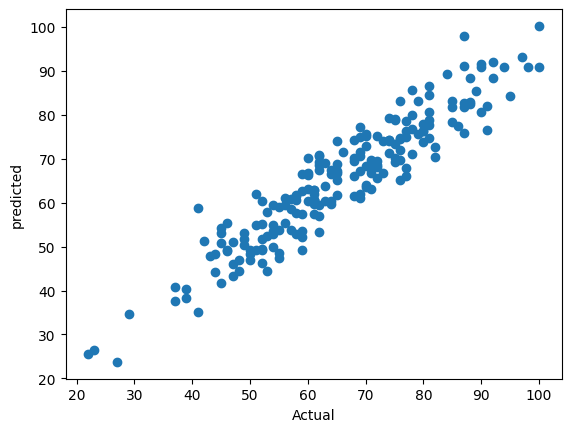

In [24]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('predicted')

<Axes: xlabel='math score'>

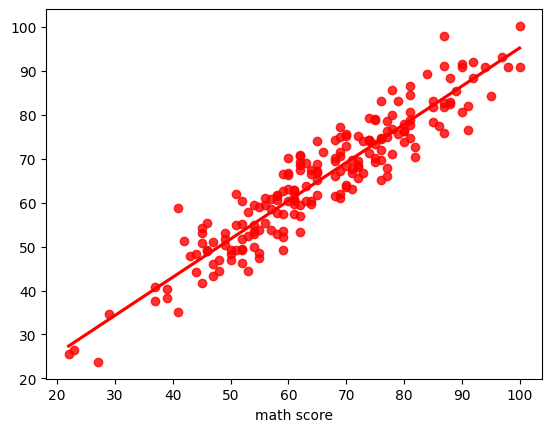

In [25]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')

In [26]:
pred_df = pd.DataFrame({'Actual Val': y_test, "Predicted val": y_pred, 'Difference': y_test - y_pred})
pred_df

,Actual Val,Predicted val,Difference
118,51,54.875000,-3.875000
19,54,49.812500,4.187500
41,58,61.734375,-3.734375
425,62,53.359375,8.640625
221,87,82.578125,4.421875
...,...,...,...
714,60,63.171875,-3.171875
744,55,53.859375,1.140625
671,52,55.109375,-3.109375
286,97,93.218750,3.781250
